# Sport Vouchers Program Analysis

The goal of this Portfolio task is to explore data from the Federal Government Sport Vouchers program - this is a
program that provides up to two $100 vouchers for kids to participate in organised sport. Here's the [NSW Active Kids page](https://www.service.nsw.gov.au/transaction/apply-active-kids-voucher), there are similar schemes in other states - this data is from South Australia.

This is an exercise in exploring data and communicating the insights you can gain from it.  The source data comes
from the `data.gov.au` website and provides details of all Sport Vouchers that have been redeemed since February  in SA 2015 as part of the Sport Voucher program:  [Sports Vouchers Data](https://data.gov.au/dataset/ds-sa-14daba50-04ff-46c6-8468-9fa593b9f100/details).  This download is provided for you as `sportsvouchersclaimed.csv`.

To augment this data you can also make use of [ABS SEIFA data by LGA](http://stat.data.abs.gov.au/Index.aspx?DataSetCode=ABS_SEIFA_LGA#) which shows a few measures of Socioeconomic Advantage and Disadvantage for every Local Government Area. This data is provided for you as `ABS_SEIFA_LGA.csv`. This could enable you to answer questions about whether the voucher program is used equally by parents in low, middle and high socioeconomic areas.   You might be interested in this if you were concerned that this kind of program might just benifit parents who are already advantaged (they might already be paying for sport so this program wouldn't be helping much).

Questions:
* Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out? 
* Are some sports more popular in different parts of the state?
* Are any LGAs over/under represented in their use of vouchers?
* Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

A challenge in this task is to display a useful summary of the data given that there are a large number of LGAs and sports involved.  Try to avoid long lists and large tables. Think about what plots and tables communicate the main points of your findings. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read the sports vouchers data
sa_vouchers = pd.read_csv("files/sportsvouchersclaimed.csv")
sa_vouchers.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015


The SEIFA data includes row for each Local Government Area (LGA) but the names of the LGAs have a letter or letters in brackets after the name.  To allow us to match this up with the voucher data we remove this and convert to uppercase. 

For each LGA the data includes a number of measures all of which could be useful in your exploration.  

In [3]:
# read the SEIFA data, create an LGA column by removing the letters in brackets and converting to uppercase
seifa = pd.read_csv('files/ABS_SEIFA_LGA.csv')
lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()
seifa['LGA'] = lga
seifa.head()

<ipython-input-3-8c32cb05a179>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()


,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value,LGA
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967,ALBURY
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628,ALBURY
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169,ALBURY
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851,ALBURY
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985,ARMIDALE DUMARESQ


Since there are many rows per LGA we need to use `pivot_table` to create a new data frame with one row per LGA. Here
is an example of doing this to create a table with the different SCORE measures and the population (URP) field. 

In [4]:
LGA_scores = seifa[seifa.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores.head()
LGA_pop = seifa[seifa.MEASURE == 'URP'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores['Population'] = LGA_pop.IEO
LGA_scores.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD,Population
LGA,,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0,19606.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0,38601.0
ALBANY,999.0,999.0,977.0,987.0,33614.0
ALBURY,964.0,964.0,967.0,979.0,47851.0
ALEXANDRINA,1000.0,1000.0,969.0,987.0,23693.0


This data frame can then be joined with the vouchers data fram to create one master data frame containing both the voucher data and the SEIFA measures.

In [5]:
sa_vouchers_scores = sa_vouchers.join(LGA_scores, on='Participant_LGA')
sa_vouchers_scores.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015,996.0,996.0,975.0,993.0,159517.0
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016,996.0,996.0,975.0,993.0,159517.0
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016,996.0,996.0,975.0,993.0,159517.0
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017,996.0,996.0,975.0,993.0,159517.0
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015,996.0,996.0,975.0,993.0,159517.0


In [6]:
#Grouping the number of partipants who used the sports voucher
LGA_count = sa_vouchers_scores.groupby('Participant_LGA').count()
LGA_count1 = LGA_count[['Participant_ID']]
LGA_count1_new = LGA_count1.rename(columns={'Participant_ID': 'Number_of_participants'})
LGA_count1_new.head()

,Number_of_participants
Participant_LGA,
ADELAIDE,302
ADELAIDE HILLS,4756
ADELAIDE PLAINS,899
ALEXANDRINA,2979
BAROSSA,2874


<AxesSubplot:xlabel='Participant_LGA'>

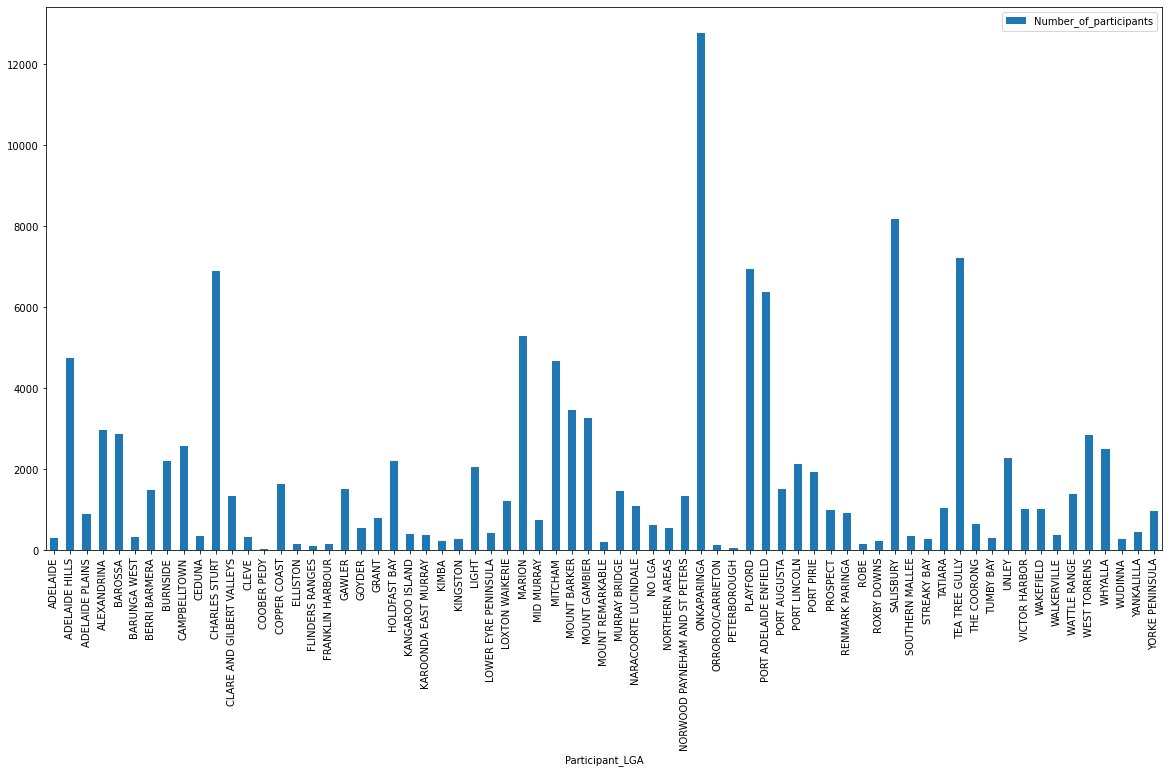

In [7]:
#Plotting the data on a barchart
LGA_count1_new.plot.bar(figsize=(20,10))

## Interpretation 
The bar graph represents the amount of sports voucher used per LGA in South Australia. Onkaparinga has over 12000 people using the sports voucher and is quite an outlier as the second most one has around 8000. There are some LGA’s with close to zero uses of vouchers. 

In [8]:
#Grouping the number of partipants who used the sports voucher on what sport
LGA_sports = sa_vouchers_scores.groupby('Voucher_Sport').count()
LGA_sports1 = LGA_sports[['Participant_ID']]
LGA_sports1_new = LGA_sports1.rename(columns={'Participant_ID': 'Number_of_participants'})
LGA_sports1_new.head()

,Number_of_participants
Voucher_Sport,
Archery,34
Athletics,4518
Australian Rules,47224
BMX,157
Badminton,4


<AxesSubplot:xlabel='Voucher_Sport'>

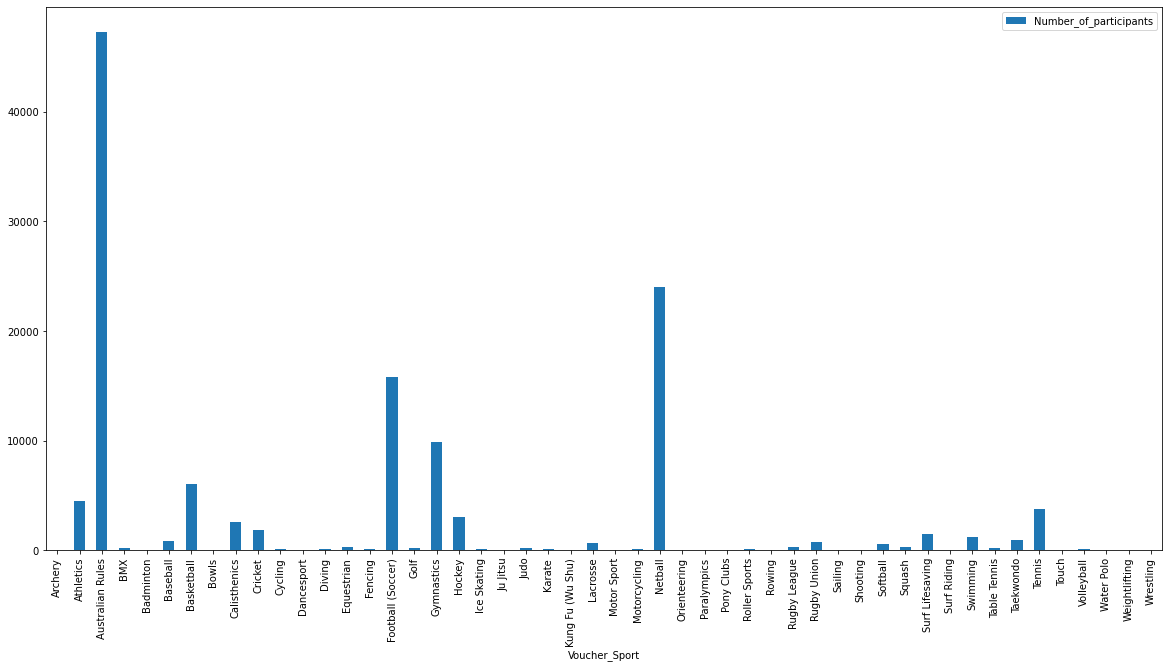

In [9]:
#Plotting the data on a barchart
LGA_sports1_new.plot.bar(figsize=(20,10))

## Interpretation
The bar graph shows what type of sports the voucher was used on Australian rules and it is the highest compared to any other sports with over 40000 used. The second sport was Netball with 25000 voucher used with a majority of the other sports have very little vouchers used.

In [10]:
#Grouping LGA and sports together
clean_LGA = sa_vouchers_scores[['Participant_LGA', 'Voucher_Sport']]
clean_LGA.head()

,Participant_LGA,Voucher_Sport
0,ONKAPARINGA,Australian Rules
1,ONKAPARINGA,Australian Rules
2,ONKAPARINGA,Gymnastics
3,ONKAPARINGA,Gymnastics
4,ONKAPARINGA,Gymnastics


In [11]:
#Finding the size of each LGA and the sport the voucher was used on
clean_LGA_count = clean_LGA.groupby(['Participant_LGA', 'Voucher_Sport']).size()
clean_LGA_count.head()

Participant_LGA  Voucher_Sport   
ADELAIDE         Athletics            16
                 Australian Rules    130
                 Baseball              1
                 Basketball            4
                 Calisthenics          1
dtype: int64

In [12]:
#Putting the data into a frame
LGA = clean_LGA_count.to_frame()
LGA

0
Participant_LGA Voucher_Sport        
ADELAIDE        Athletics          16
                Australian Rules  130
                Baseball            1
                Basketball          4
                Calisthenics        1
...                               ...
YORKE PENINSULA Motorcycling        2
                Netball           313
                Surf Lifesaving     4
                Taekwondo          87
                Tennis              9

[1157 rows x 1 columns]

In [13]:
#Reseting the index for the dataframe
LGA.reset_index(inplace=True)

In [14]:
LGA

,Participant_LGA,Voucher_Sport,0
0,ADELAIDE,Athletics,16
1,ADELAIDE,Australian Rules,130
2,ADELAIDE,Baseball,1
3,ADELAIDE,Basketball,4
4,ADELAIDE,Calisthenics,1
...,...,...,...
1152,YORKE PENINSULA,Motorcycling,2
1153,YORKE PENINSULA,Netball,313
1154,YORKE PENINSULA,Surf Lifesaving,4
1155,YORKE PENINSULA,Taekwondo,87


In [15]:
#Pivioting the table so voucher sport values become column name
LGApivot = pd.pivot_table(LGA, index = 'Participant_LGA', columns = 'Voucher_Sport')

In [16]:
LGApivot

0                                                     \
Voucher_Sport   Archery Athletics Australian Rules  BMX Badminton Baseball   
Participant_LGA                                                              
ADELAIDE            NaN      16.0            130.0  NaN       NaN      1.0   
ADELAIDE HILLS      3.0     204.0           1412.0  2.0       NaN     11.0   
ADELAIDE PLAINS     NaN       3.0            485.0  NaN       NaN      3.0   
ALEXANDRINA         9.0      62.0            980.0  4.0       3.0      NaN   
BAROSSA             NaN     158.0           1196.0  3.0       NaN      6.0   
...                 ...       ...              ...  ...       ...      ...   
WEST TORRENS        1.0     114.0            907.0  2.0       NaN     12.0   
WHYALLA             NaN      15.0            569.0  NaN       NaN      NaN   
WUDINNA             NaN      29.0             44.0  NaN       NaN      NaN   
YANKALILLA          3.0      10.0            214.0  NaN       NaN      NaN   
YORKE PENINSULA     NaN      30.0            309.0  NaN       NaN      NaN   

                                                       ...              \
Voucher_Sport   Basketball Bowls Calisthenics Cricket  ... Surf Riding   
Participant_LGA                                        ...               
ADELAIDE               4.0   NaN          1.0     2.0  ...         NaN   
ADELAIDE HILLS        48.0   NaN         62.0   128.0  ...         NaN   
ADELAIDE PLAINS       15.0   NaN         23.0     3.0  ...         NaN   
ALEXANDRINA          204.0   NaN          5.0     8.0  ...         2.0   
BAROSSA              341.0   NaN          9.0    56.0  ...         NaN   
...                    ...   ...          ...     ...  ...         ...   
WEST TORRENS          70.0   NaN         45.0    85.0  ...         NaN   
WHYALLA              605.0   NaN         15.0    12.0  ...         NaN   
WUDINNA                NaN   NaN          NaN     NaN  ...         NaN   
YANKALILLA             1.0   NaN          NaN     NaN  ...         NaN   
YORKE PENINSULA       87.0   NaN          NaN     9.0  ...         NaN   

                                                                         \
Voucher_Sport   Swimming Table Tennis Taekwondo Tennis Touch Volleyball   
Participant_LGA                                                           
ADELAIDE             NaN          NaN      11.0    4.0   NaN        NaN   
ADELAIDE HILLS      18.0          3.0      44.0  257.0   2.0        1.0   
ADELAIDE PLAINS      3.0          NaN       NaN   13.0   NaN        NaN   
ALEXANDRINA         11.0          NaN       NaN  109.0   NaN        NaN   
BAROSSA             12.0          NaN       NaN   83.0   NaN        NaN   
...                  ...          ...       ...    ...   ...        ...   
WEST TORRENS        80.0          4.0      27.0  158.0   1.0        4.0   
WHYALLA              8.0          NaN       NaN    NaN   NaN        NaN   
WUDINNA              NaN          NaN       NaN    NaN   NaN        NaN   
YANKALILLA           NaN          NaN       1.0    2.0   NaN        NaN   
YORKE PENINSULA      NaN          NaN      87.0    9.0   NaN        NaN   

                                                    
Voucher_Sport   Water Polo Weightlifting Wrestling  
Participant_LGA                                     
ADELAIDE               NaN           NaN       NaN  
ADELAIDE HILLS         1.0           NaN       NaN  
ADELAIDE PLAINS        NaN           NaN       NaN  
ALEXANDRINA            NaN           NaN       NaN  
BAROSSA                NaN           NaN       NaN  
...                    ...           ...       ...  
WEST TORRENS           2.0           NaN       NaN  
WHYALLA                NaN           NaN       NaN  
WUDINNA                NaN           NaN       NaN  
YANKALILLA             NaN           NaN       NaN  
YORKE PENINSULA        NaN           NaN       NaN  

[69 rows x 50 columns]

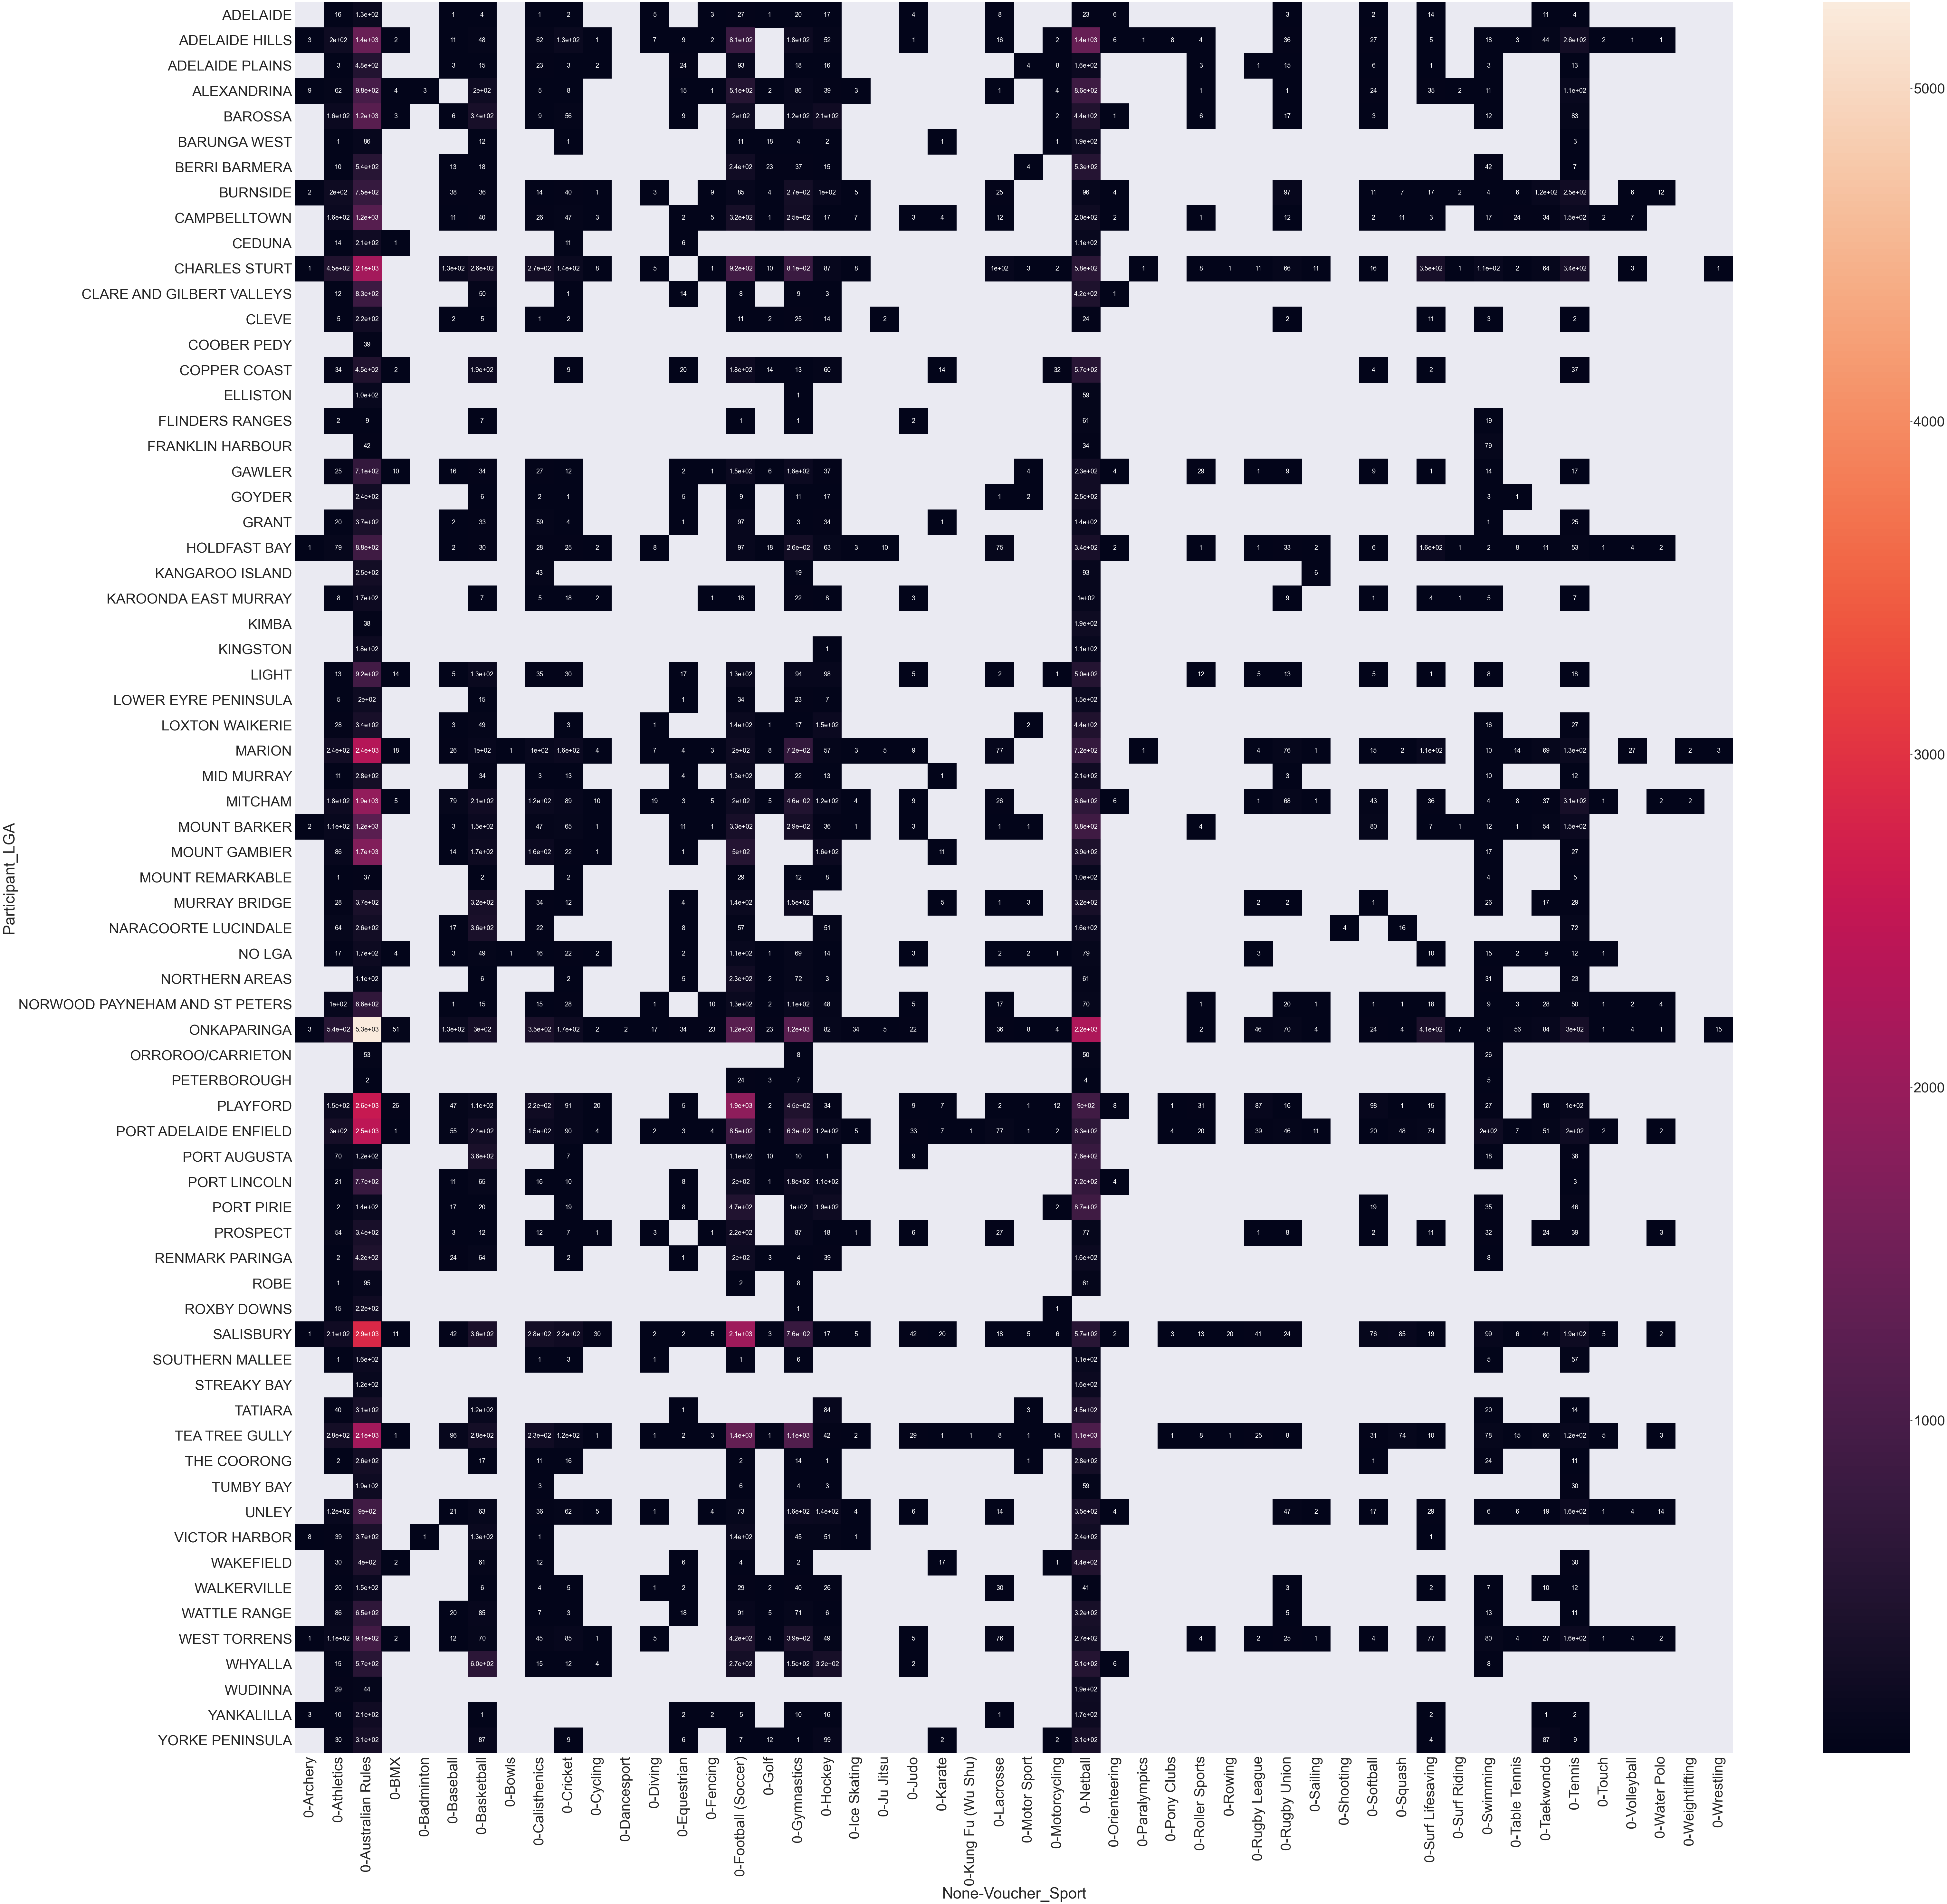

In [26]:
#Plotting the dataframe on a heatmap
plt.subplots(figsize=(100,100))
sns.heatmap(LGApivot, annot=True, annot_kws={"fontsize":20})
sns.set(font_scale=30)

# Interpretation
The heatmap illustrates the number of participants in the sports voucher program. Australian rules seem to have the most participants and Onkaparinga has the most users in the sports voucher program. There doesn’t seem to be any notable outliers in any sport in any region.

In [30]:
#Combining two seperate dataframes together
LGA_count_population = LGA_count1_new.join(LGA_scores, on='Participant_LGA')
LGA_count_population.head()

,Number_of_participants,IEO,IER,IRSAD,IRSD,Population
Participant_LGA,,,,,,
ADELAIDE,302,874.0,874.0,1036.0,1013.0,19606.0
ADELAIDE HILLS,4756,1083.0,1083.0,1077.0,1081.0,38601.0
ADELAIDE PLAINS,899,NaN,NaN,NaN,NaN,NaN
ALEXANDRINA,2979,1000.0,1000.0,969.0,987.0,23693.0
BAROSSA,2874,1028.0,1028.0,997.0,1017.0,22174.0


In [31]:
#Dropping the useless columns
LGA_count_population = LGA_count_population.drop(['IEO', 'IER', 'IRSAD', 'IRSD'], axis = 1)
LGA_count_population = LGA_count_population.dropna(axis=0)
LGA_count_population.head()

,Number_of_participants,Population
Participant_LGA,,
ADELAIDE,302,19606.0
ADELAIDE HILLS,4756,38601.0
ALEXANDRINA,2979,23693.0
BAROSSA,2874,22174.0
BARUNGA WEST,333,2467.0


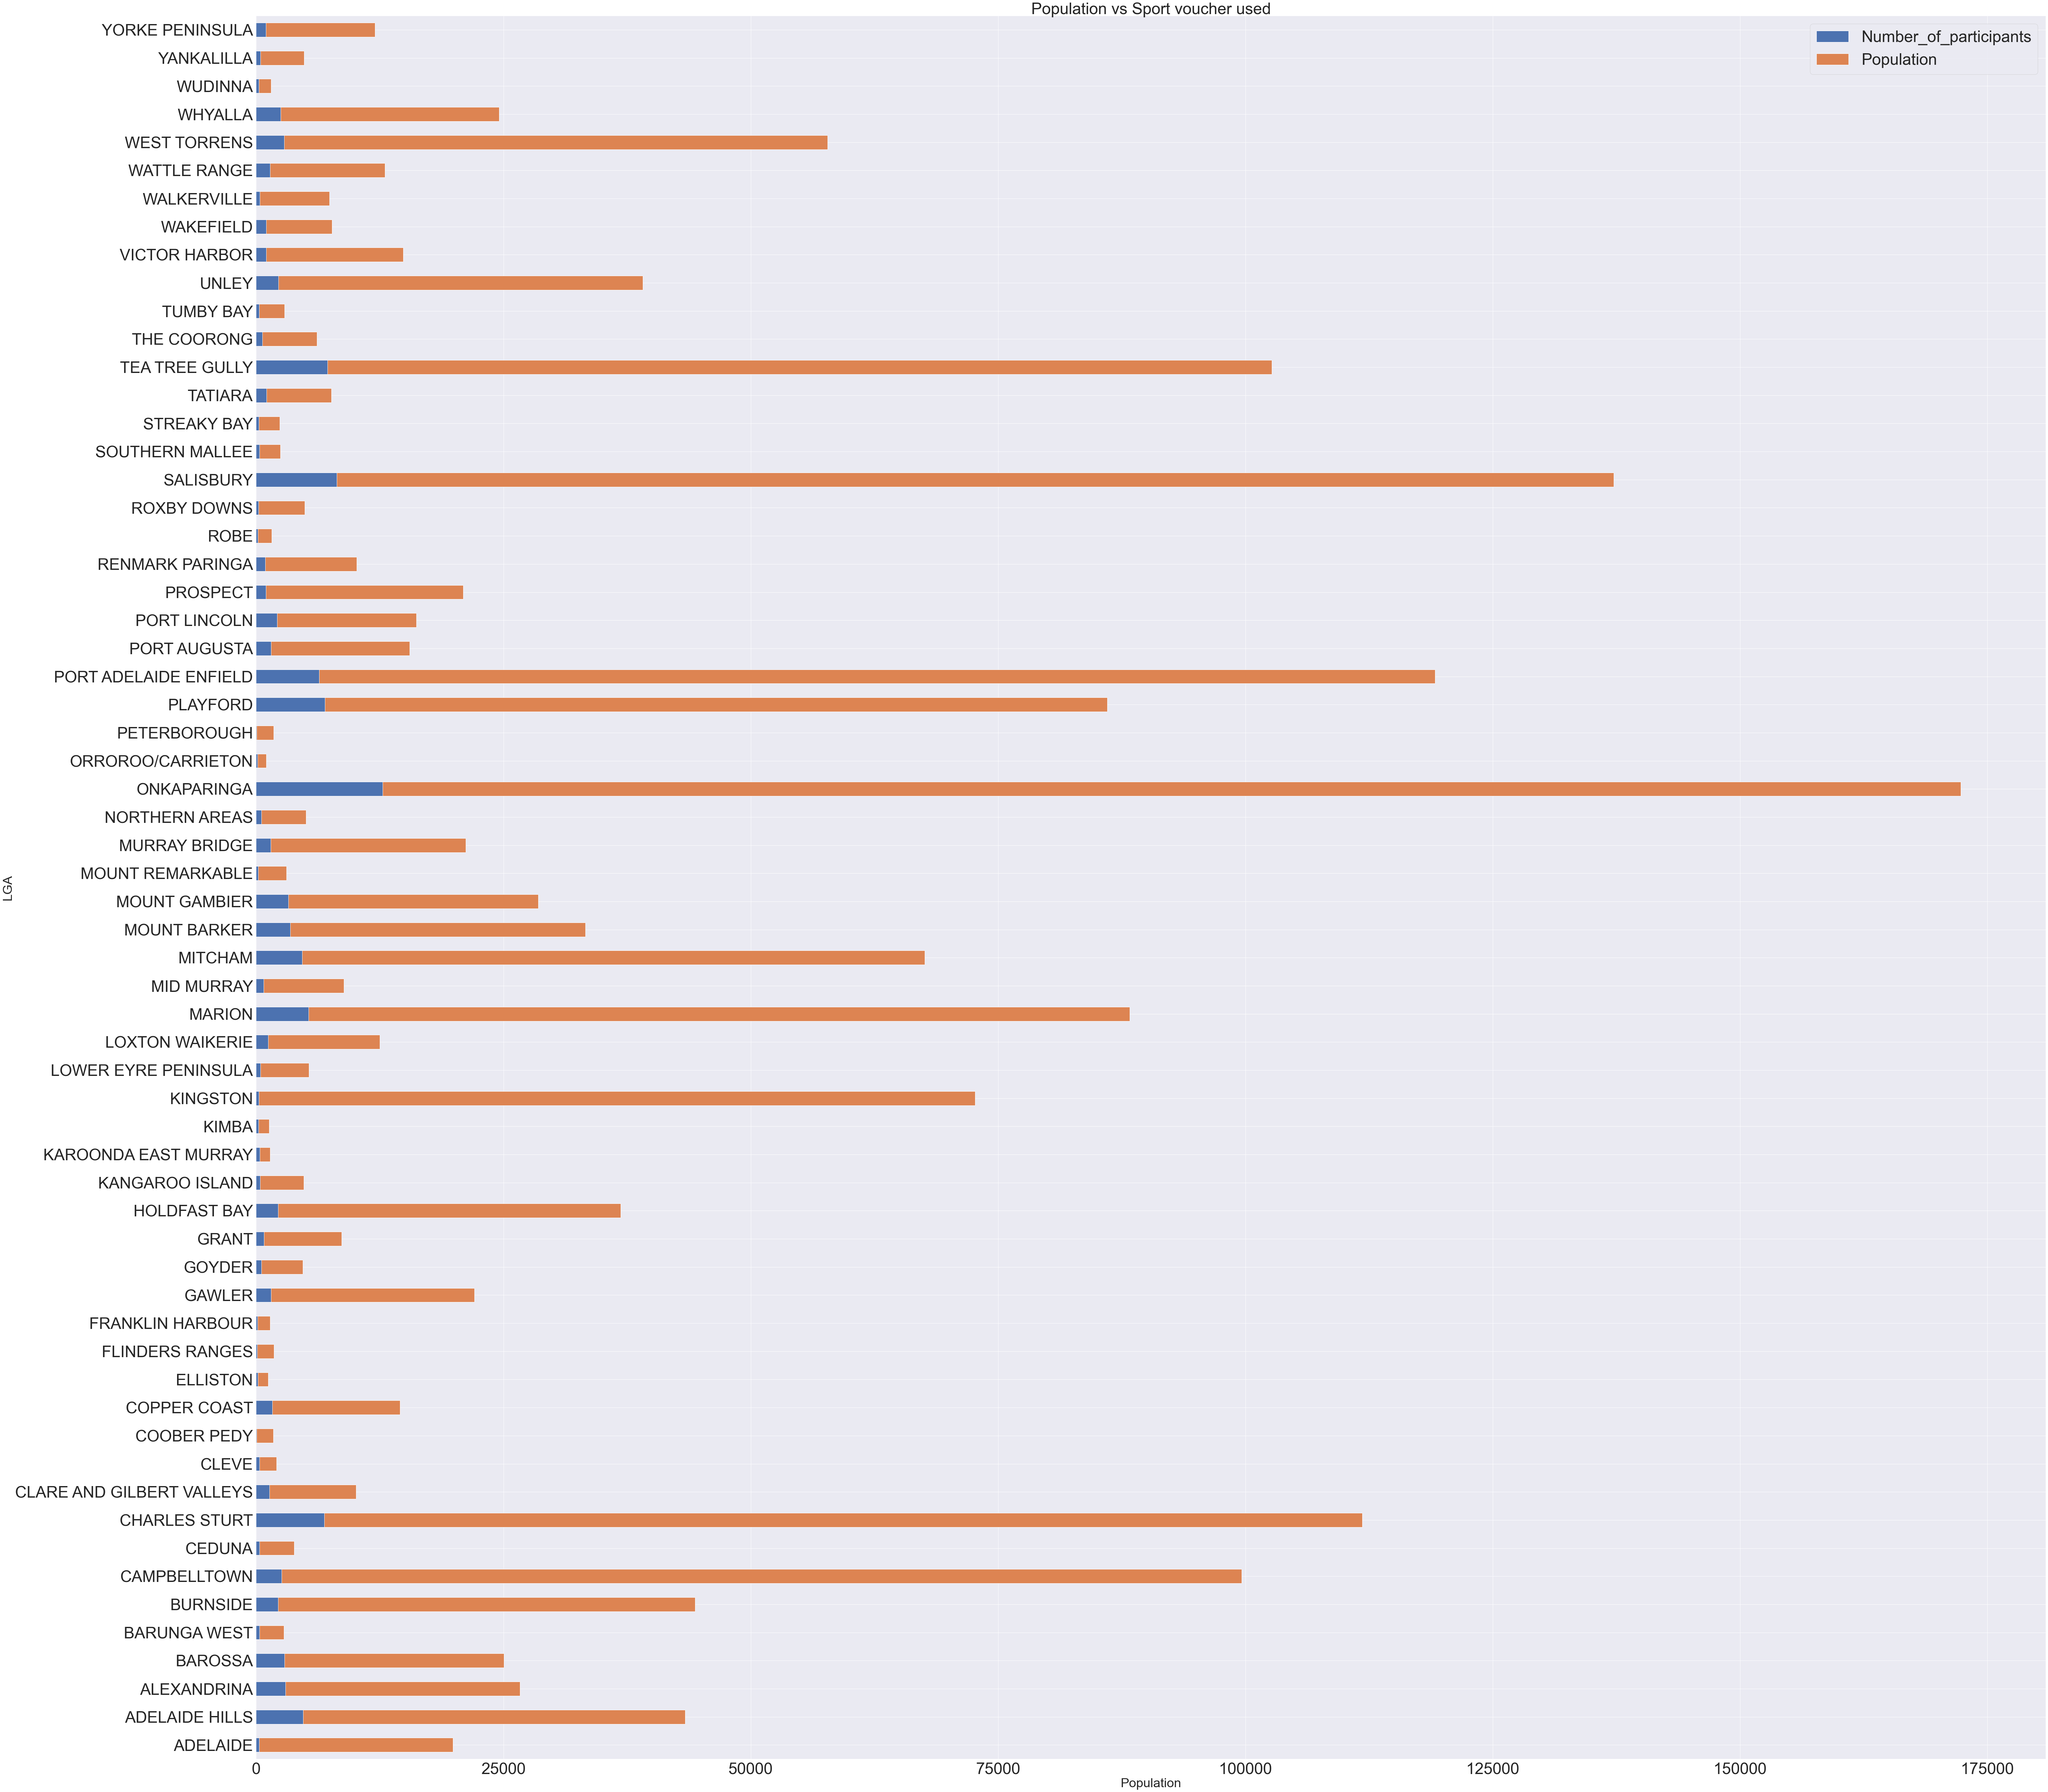

In [20]:
#Plotting the dataframe on a stacked horizontal bar chart
LGA_count_population.plot(kind = 'barh', stacked=True, figsize=(100,100), fontsize= 50)
plt.title("Population vs Sport voucher used", fontsize= 50)
plt.xlabel("Population", fontsize=40)
plt.ylabel('LGA',  fontsize=40)
plt.legend(fontsize=50)

# Interpretation
Onkaparinga has the highest population and also the highest particpants in the sports voucher. Adelaide has a very low number of partipants of sports voucher usage compared to population. 

In [21]:
#Combining two graphs and then dropping the null values
LGA_count_score = LGA_count1_new.join(LGA_scores, on='Participant_LGA')
LGA_count_score = LGA_count_score.drop(columns = "Population")
LGA_count_score = LGA_count_score.dropna()

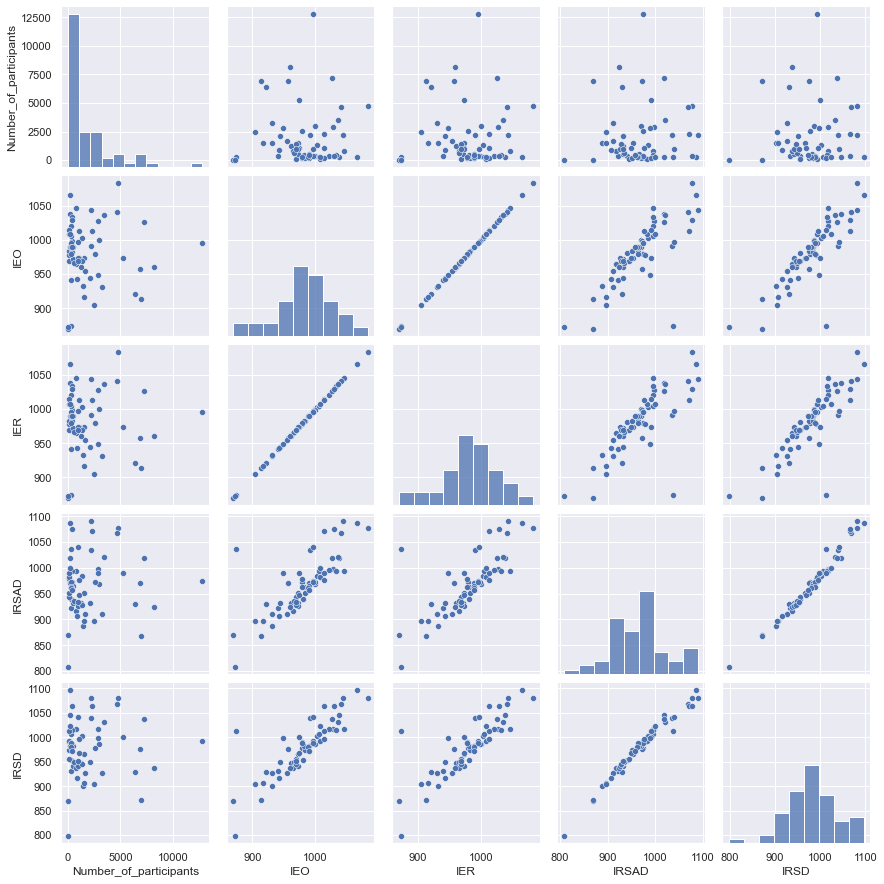

In [34]:
#Plotting the values on a pairplot
sns.pairplot(LGA_count_score)

In [23]:
#Finding the correlation numbers
LGA_count_score.corr()

,Number_of_participants,IEO,IER,IRSAD,IRSD
Number_of_participants,1.000000,-0.000399,-0.000399,0.044818,0.026067
IEO,-0.000399,1.000000,1.000000,0.781360,0.848105
IER,-0.000399,1.000000,1.000000,0.781360,0.848105
IRSAD,0.044818,0.781360,0.781360,1.000000,0.985054
IRSD,0.026067,0.848105,0.848105,0.985054,1.000000


# Interpretation

There doesn’t seem to be any correlation in the scatter plots on the number of participants in the sports voucher and the SEIFA scores. The correlation matrix further supports that there is no correlation between number of participants in the sports voucher and to SEIFA scores.

## Challenge - Queensland

_Note: this is an extra task that you might take on to get a better grade for your portfolio.  You can get a good pass grade without doing this._ 

Queensland has a similar program called [Get Started](https://data.gov.au/dataset/ds-qld-3118838a-d425-48fa-bfc9-bc615ddae44e/details?q=get%20started%20vouchers) and we can retrieve data from their program in a similar format.  

The file [round1-redeemed_get_started_vouchers.csv](files/round1-redeemed_get_started_vouchers.csv) contains records of the vouchers issued in Queensland. The date of this data is not included but the program started in 2015 so it is probably from around then.  

The data includes the LGA of the individual but the name of the activity is slightly different.  To do a comparable analysis you would need to map the activity names onto those from South Australia. 

In [24]:
qld_vouchers = pd.read_csv('files/round1-redeemed_get_started_vouchers.csv')
qld_vouchers.head()

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00


In [25]:
# Join the QLD data with the LGA data as before to get population and SIEFA data integrated
qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()
qld_vouchers_scores = qld_vouchers.join(LGA_scores, on='LGA')
qld_vouchers_scores.head()

<ipython-input-25-d688531e2bfc>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()


,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment,LGA,IEO,IER,IRSAD,IRSD,Population
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01,WHITSUNDAY,989.0,989.0,966.0,982.0,31393.0
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
